In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import time_evolutor as te
import plotting as p

import sys
sys.path.append('/../../temp_prog/')
import tur_calculator as tc



In [2]:
#------------------SETUP-------------------

T_L = 10 
T_R = 10
V_B = 30
eps = 0

INPUT = {
    'eps': eps,
    'omega': 0, 
    'u': 250, 
    'V_B': V_B,
    'gamma': 1,  
    'T_L': T_L,
    'T_R': T_R,
    'delta_gamma': 0.04,
    'delta_epsilon': 0.04,
}

initial = [1/4,1/4,1/4,1/4,0,0]         #beginns with both QDs empty
ti_array = np.linspace(0,1e5,10000)

In [3]:
importlib.reload(te)
sys, rho_ss, rho_t, I_ss, I, I_var, P, J_QH = te.calculate_paper_meta(initial, ti_array, **INPUT, reverse_mu=True)

OBS REVERSED MU CONVENTION!!
[[ 1. -0. -0. -0.  0. -0.]
 [-0.  1.  0.  0.  0.  0.]
 [-0.  0.  1.  0.  0. -0.]
 [ 0.  0.  0.  1.  0. -0.]
 [-0.  0.  0.  0.  1.  0.]
 [-0.  0.  0. -0. -0.  1.]]
check l1 is identity: [-0.5 -0.5 -0.5 -0.5  0.  -0. ]
eigenvalues: [ 1.67400815e-16+0.j -6.17873972e-03+0.j -9.95427849e-01+0.j
 -1.00027542e+00+0.j -3.99811800e+00+0.j -4.00000000e+00+0.j]

~~ Re(lambda3)/re(lambda2): ~~
-1.0002754164095324/-0.006178739718846476=161.10532144165518
dim 6
I_ss:  0.38238544562180327
right lead?  -0.3823854456218033
Current:  0.38238544562182
heat current:  [-5.73545821 -5.73610516]
J_QH:  [-122.26356355   -4.80621639   -4.8618985  ...   -5.73545821   -5.73545821
   -5.73545821]


In [4]:
#Re(lambda3/lambda2)
-9.95374363e-02/-6.20944440e-04

160.30006855363743

In [5]:
print(I[1])

0.3204271968908679


IndexError: index 6 is out of bounds for axis 0 with size 6

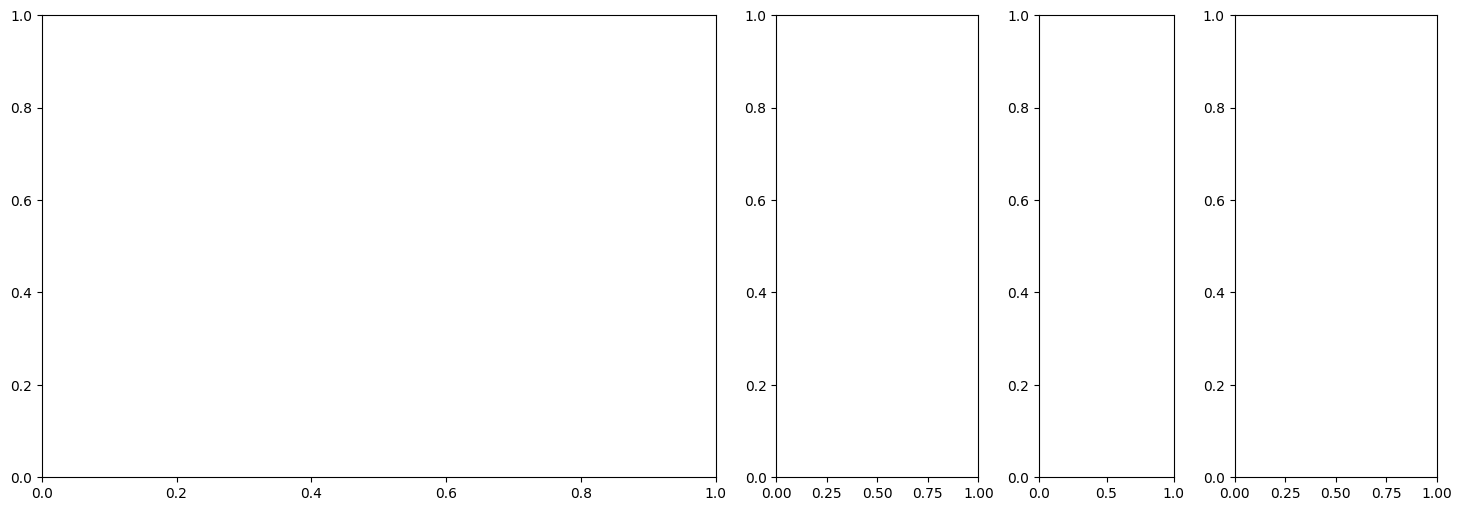

In [8]:
#EVOLUTION OF DIAGONAL COMPONENTS
importlib.reload(p)
p.plot_rho(ti_array, rho_t, sys, eps, V_B, T_L, T_R)

Text(0.5, 1.0, 'First 4 datapoints')

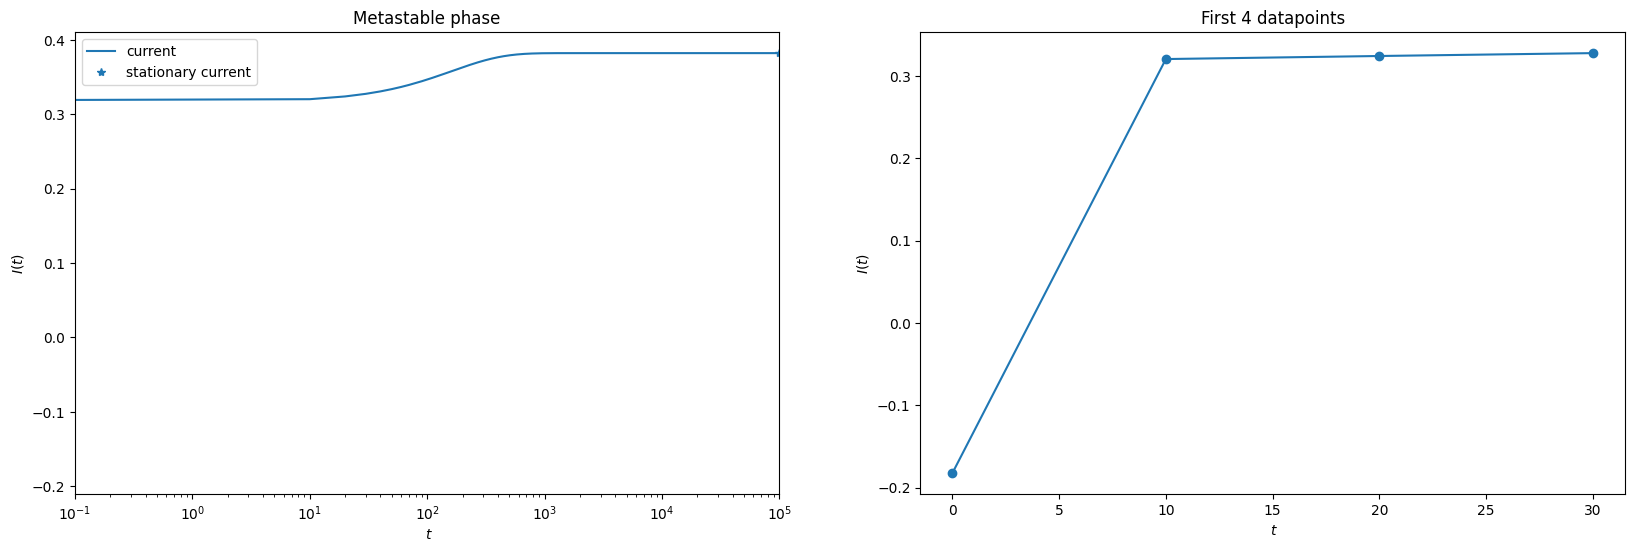

In [7]:
#plotting particle current

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax1.plot(ti_array,I, label = 'current')
ax1.plot(ti_array[-1], I_ss, '*', color = 'C0', label='stationary current')

ax1.legend()

ax1.set_xlabel(r' $t$')
ax1.set_ylabel(r'$I(t)$')
ax1.set_xscale('log')
ax1.set_xlim(1e-1,1e5)
ax1.set_title('Metastable phase')

ax2.plot(ti_array[0:4], I[0:4])
ax2.scatter(ti_array[0:4], I[0:4])
ax2.set_xlabel(r' $t$')
ax2.set_ylabel(r'$I(t)$')
ax2.set_title('First 4 datapoints')

In [ ]:
print(ti_array[1])

20.004000800160032


In [ ]:
importlib.reload(tc)
TUR, eff_carnot, eff, sigma = tc.calculate_tur(T_L, T_R, I, I_var, J_QH, P)

UnboundLocalError: cannot access local variable 'T_COLD' where it is not associated with a value

In [ ]:
print('Min-TUR: ',np.min(TUR))
print('TUR at t=200: ', TUR[1])

NameError: name 'TUR' is not defined

Text(0.5, 1.0, 'Current')

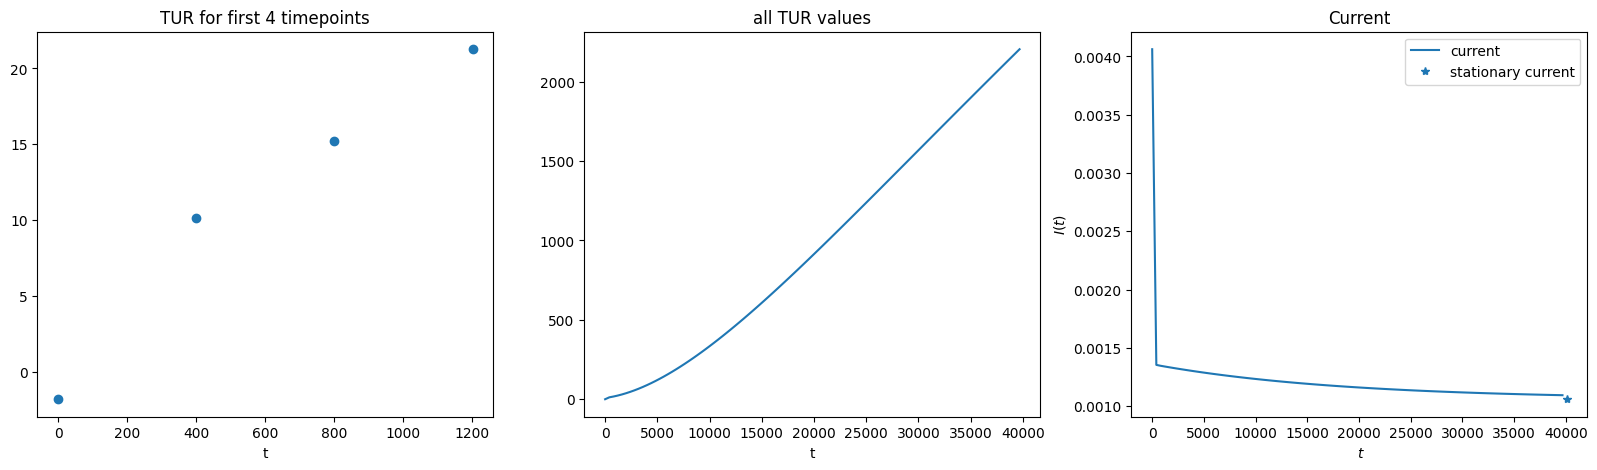

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

TUR_masked = np.ma.masked_where(TUR >= 2, TUR)
axes[0].scatter(ti_array[0:4], TUR[0:4])
axes[0].set_title('TUR for first 4 timepoints')
axes[0].set_xlabel('t')

axes[1].plot(ti_array[0:100], TUR[0:100])
axes[1].set_title('all TUR values')
axes[1].set_xlabel('t')


axes[2].plot(ti_array[0:100],I[0:100], label = 'current')
axes[2].plot(ti_array[100], I_ss, '*', color = 'C0', label='stationary current')

axes[2].legend()

axes[2].set_xlabel(r' $t$')
axes[2].set_ylabel(r'$I(t)$')
axes[2].set_title('Current')


In [ ]:
print(np.min(TUR))
print(TUR[0])

-1.7994474215038554
-1.7994474215038554
